In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1.Generate summary statistics (mean, median, std, etc.)

In [3]:
print("Summary Statistics:")
print(df.describe(include='all').T)
print("\nMedian Values:")
print(df.median(numeric_only=True))
print("\nMissing values:\n", df.isnull().sum())

Summary Statistics:
             count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
Pas

## 2.Creat histograms and boxplot

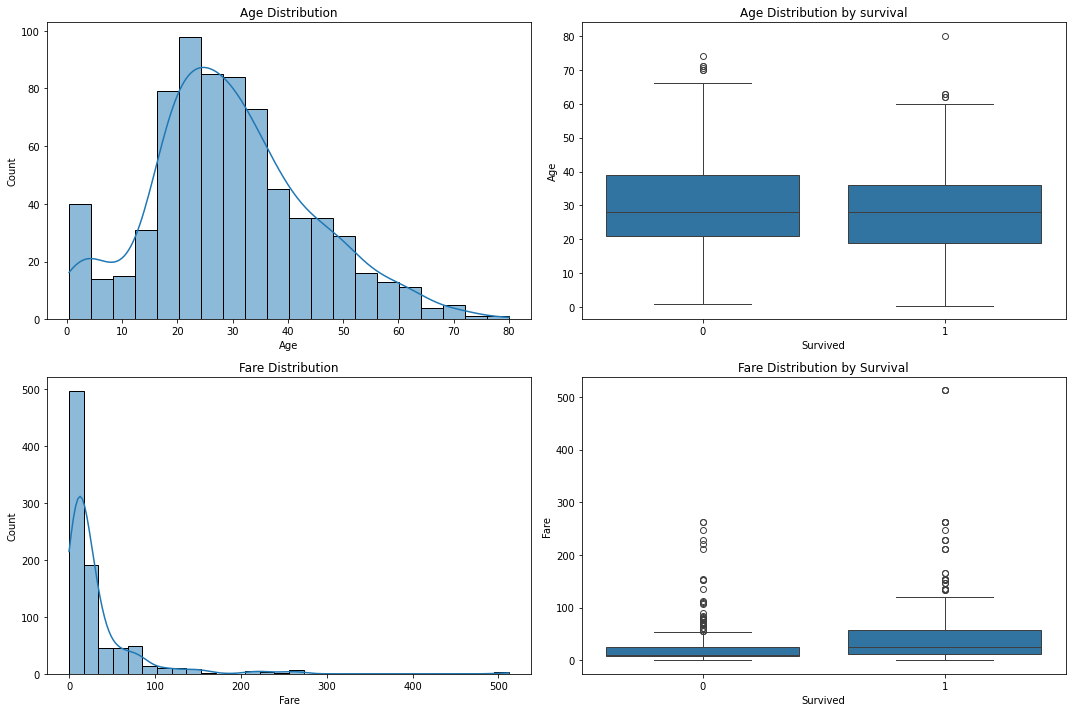

In [4]:
plt.figure(figsize=(15,10))

# Histogram for age
plt.subplot(2,2,1)
sns.histplot(df['Age'].dropna(),kde=True)
plt.title("Age Distribution")

# Boxplot for Age by Survival
plt.subplot(2,2,2)
sns.boxplot(x="Survived",y="Age",data=df)
plt.title("Age Distribution by survival")

# Histogram for Fare
plt.subplot(2, 2, 3)
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')

# Boxplot for Fare by Survival
plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

## 3.Pairplot and Correlation Matrix


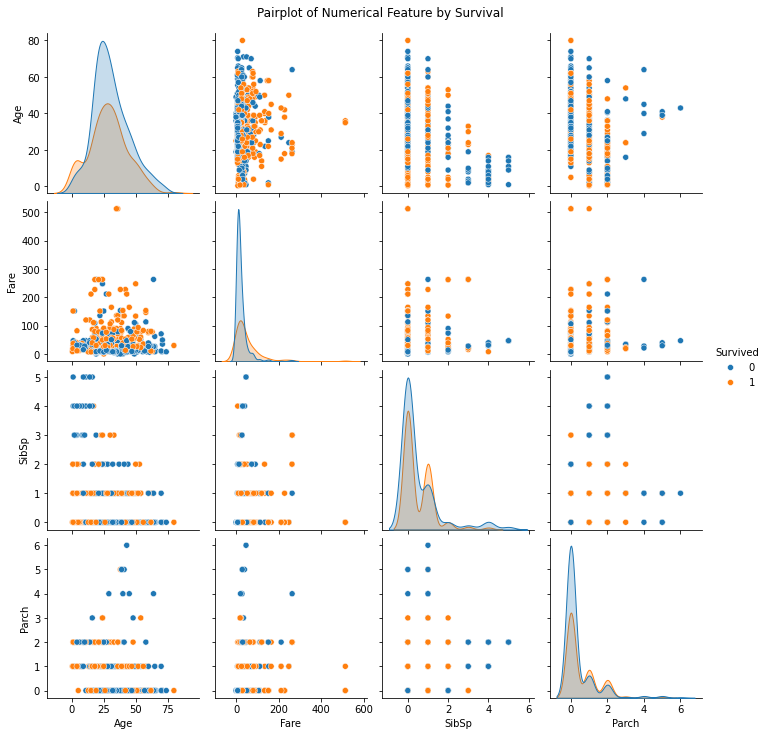

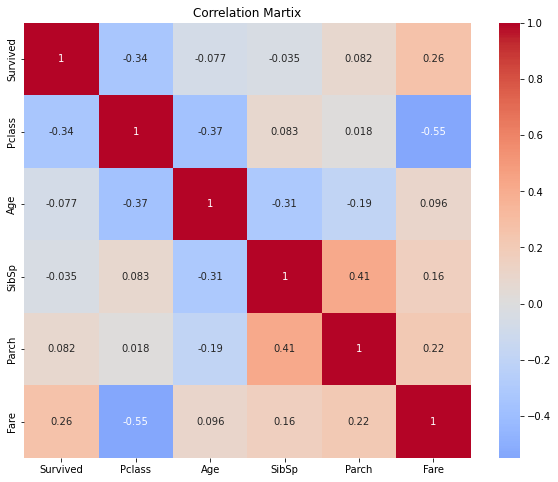

In [5]:
# Pairplot for numarical features

numerical_features = ["Age","Fare","SibSp","Parch","Survived"]
sns.pairplot(df[numerical_features].dropna(),hue='Survived')
plt.suptitle('Pairplot of Numerical Feature by Survival',y=1.02)
plt.show()

# Correlation matrix

plt.figure(figsize=(10,8))
corr_matrix = df[['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Correlation Martix')
plt.show()

## 4.Identify Patterns and Trends

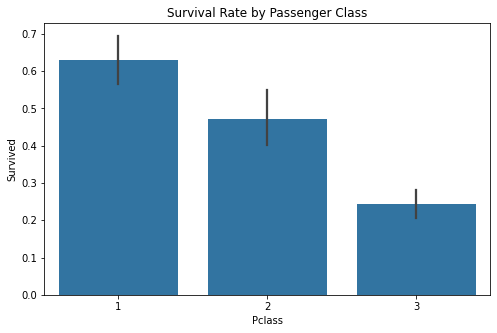

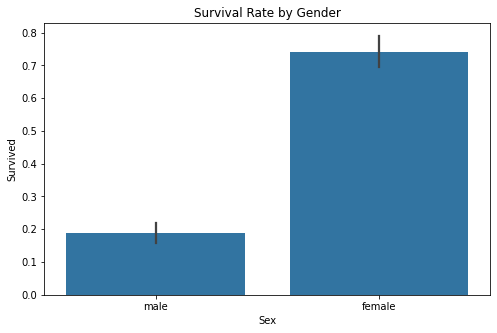

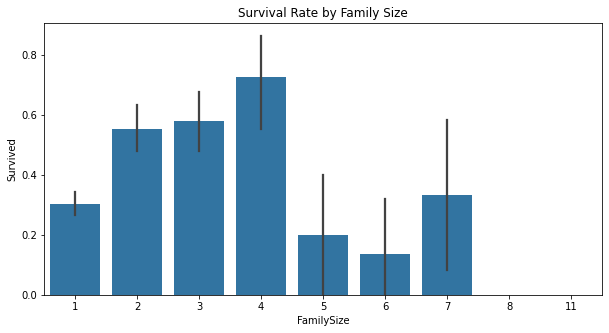

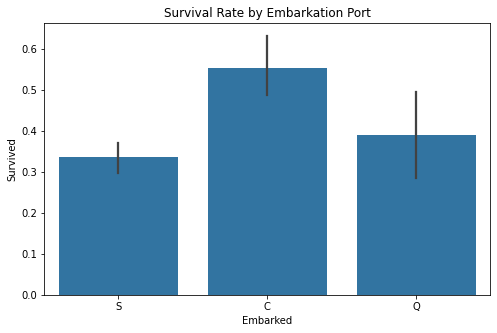

In [6]:
# Survival by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Family size analysis
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
plt.figure(figsize=(10, 5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

# Survival by embarkation port
plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

## 5.Feature-Level Inferences

In [7]:
# Calculate key metrics
print("\nKey Statistics:")
print(f"Overall survival rate: {df['Survived'].mean()*100:.2f}%")
print("\nSurvival rate by class:")
print(df.groupby('Pclass')['Survived'].mean())
print("\nSurvival rate by gender:")
print(df.groupby('Sex')['Survived'].mean())
print("\nAverage fare by class:")
print(df.groupby('Pclass')['Fare'].mean())
print("\nAverage age by survival:")
print(df.groupby('Survived')['Age'].mean())

# Age groups analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 100], 
                      labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
print("\nSurvival rate by age group:")
print(df.groupby('AgeGroup')['Survived'].mean())


Key Statistics:
Overall survival rate: 38.38%

Survival rate by class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Average fare by class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Average age by survival:
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Survival rate by age group:
AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.355556
Adult          0.423237
Senior         0.343750
Name: Survived, dtype: float64
